<a href="https://colab.research.google.com/github/ReddySameer/tensorflow/blob/main/03_part2_multiclass_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Class Image Classification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#un zip


--2024-05-25 14:01:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.207, 142.250.157.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  28.3MB/s    in 18s     

2024-05-25 14:02:08 (27.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through the 10 food classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/train'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [ ]:
!ls -al

total 507044
drwxr-xr-x 1 root root      4096 May 24 18:34 .
drwxr-xr-x 1 root root      4096 May 24 18:29 ..
drwxr-xr-x 4 root root      4096 May 24 18:34 10_food_classes_all_data
-rw-r--r-- 1 root root 519183241 Feb 16  2021 10_food_classes_all_data.zip
drwxr-xr-x 4 root root      4096 May 23 13:24 .config
drwxr-xr-x 2 root root      4096 May 24 18:33 .ipynb_checkpoints
drwxr-xr-x 3 root root      4096 May 24 18:34 __MACOSX
drwxr-xr-x 1 root root      4096 May 23 13:25 sample_data


In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
#view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  #setup target directory
  target_folder = target_dir+"/"+target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (512, 512, 3)


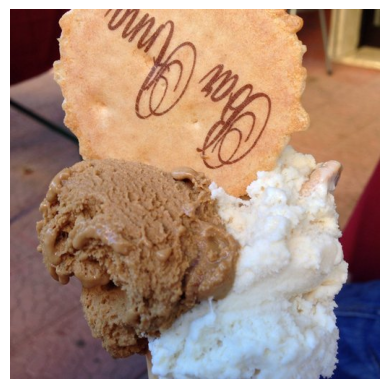

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical"
                                               )
test_data = test_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical"
                                               )

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


3. Create the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [ ]:


model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # softmax for multiclass classification
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_8.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 761s 3s/step - loss: 2.2623 - accuracy: 0.1517 - val_loss: 2.0874 - val_accuracy: 0.2449
Epoch 2/5
 65/235 [=======>......................] - ETA: 6:13 - loss: 2.0141 - accuracy: 0.2859

KeyboardInterrupt: 

# 4. Evaluate the model

In [ ]:
model_8.evaluate(test_data)

235/235 [==============================] - 174s 740ms/step - loss: 1.8924 - accuracy: 0.3236


[1.8924256563186646, 0.32359999418258667]

# Plot loss Curves

In [ ]:
def plot_loss_curves(history):
  """
  return separate loss curves for training and validation maetrics
  """

  loss  = history.history['loss']
  val_loss  = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="Val_loss")
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

    #plot loss
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="Val_accuracy")
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

## Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

The model is not gernatlizing well to unseen data -- overfitting
To fix overfitting:

1.   **get more data**
2.   **Simply the model** - reduce the num of hidden unit in layers - Data Augmentation
3.    **Data Augmentation** - manipulate the training data to add more diversity
4. **transfer learning** - leverages the patterns of another model that has learned similar data



In [ ]:
# Simplify the model - remove some layers - improve the loss & accuracy curves

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape= (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 173ms/step - loss: 2.1896 - accuracy: 0.2329 - val_loss: 1.8383 - val_accuracy: 0.3796
Epoch 2/5
235/235 [==============================] - 42s 178ms/step - loss: 1.8022 - accuracy: 0.3836 - val_loss: 1.5454 - val_accuracy: 0.4917
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.4471 - accuracy: 0.5219 - val_loss: 1.0485 - val_accuracy: 0.6968
Epoch 4/5
235/235 [==============================] - 39s 167ms/step - loss: 1.0208 - accuracy: 0.6763 - val_loss: 0.6181 - val_accuracy: 0.8627
Epoch 5/5
235/235 [==============================] - 40s 168ms/step - loss: 0.6050 - accuracy: 0.8216 - val_loss: 0.3642 - val_accuracy: 0.9175


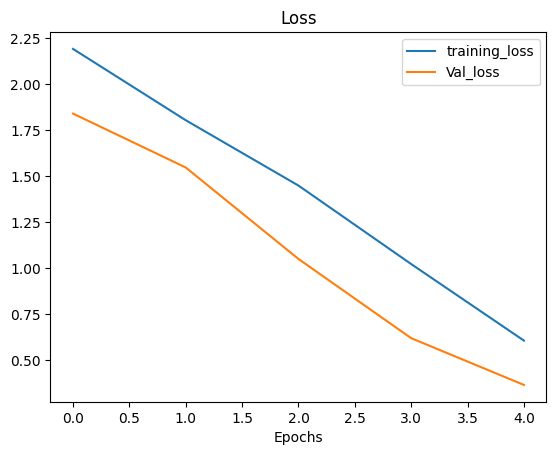

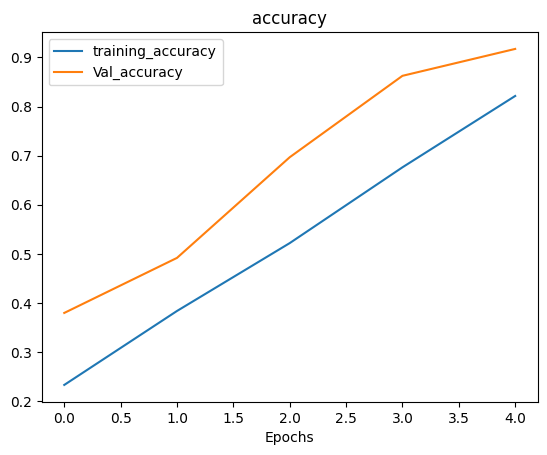

In [ ]:
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
# Data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(
                                               train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone model - create a similar new model with new inputs except that it creates new layers
# (and new weights) instead of sharing the weights of the exiting layers
model_10 = tf.keras.models.clone_model(model_8)

# Compile  the cloned model
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
history_10= model_10.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 506ms/step - loss: 2.2231 - accuracy: 0.1700 - val_loss: 2.1213 - val_accuracy: 0.2325
Epoch 2/5
235/235 [==============================] - 120s 511ms/step - loss: 2.1252 - accuracy: 0.2267 - val_loss: 2.0310 - val_accuracy: 0.2779
Epoch 3/5
168/235 [====================>.........] - ETA: 28s - loss: 2.0765 - accuracy: 0.2502

KeyboardInterrupt: 

# Improve the models performance

1.   Restructure the model architecture
2.   Adjust the learning rate
3.   Data Augumentation
4.   Train for longer - increase epoch size
5.   Transfer Learning



# Softmax activation function
The softmax function is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes.

* The softmax of each vector x is computed as exp(x) / sum(exp(x)).
* Used for multi-class predictions. The sum of all outputs generated by softmax is 1.
* softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis, keepdims=True)
* Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Make Prediction with the trained model
pred_and_plot()

In [ ]:
model_10.save("saved_trained_model_10") # saves the model to the hosted system

In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")


In [ ]:
loaded_model_10.evaluate(test_data)